In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
print(mtx)
print(dist)

[[560.33148363   0.         651.26264911]
 [  0.         561.3767079  499.06540191]
 [  0.           0.           1.        ]]
[[-2.32949182e-01  6.17242707e-02 -1.80423444e-05  3.39635746e-05
  -7.54961807e-03]]


In [3]:
# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [50]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistort_img = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undistort_img, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # 4) If corners found: 
    if ret == True:
        # a) draw corners
        cv2.drawChessboardCorners(undistort_img, (8,6), corners, ret)
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
            #Note: you could pick any four of the detected corners 
            # as long as those four corners define a rectangle
            #One especially smart way to do this would be to use four well-chosen
            # corners that were automatically detected during the undistortion steps
            #We recommend using the automatic detection of corners in your code
        src_pt = np.float32(
            [[corners[0][0][0],corners[0][0][1]],
             [corners[nx*(ny-1)][0][0],corners[nx*(ny-1)][0][1]],
             [corners[nx*ny-1][0][0],corners[nx*ny-1][0][1]],
             [corners[nx-1][0][0],corners[nx-1][0][1]]])
        # print(src_pt)
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        # dst_pt = np.float32(
        #     [[corners[0][0][0],corners[0][0][1]],
        #      [corners[0][0][0],corners[0][0][1]+(130*(ny-1))],
        #      [corners[0][0][0]+(130*(nx-1)),corners[0][0][1]+(130*(ny-1))],
        #      [corners[0][0][0]+(130*(nx-1)),corners[0][0][1]]])
        dst_pt = np.float32(
            [[200,200],
             [200,img.shape[0]-200],
             [img.shape[1]-200,img.shape[0]-200],
             [img.shape[1]-200,200]])

        # print(dst_pt)
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src_pt, dst_pt)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        img_size = (img.shape[1],img.shape[0])
        warped = cv2.warpPerspective(undistort_img, M, img_size, flags=cv2.INTER_LINEAR)
    return undistort_img, M

[[ 6.16769210e-01 -5.35124369e-02 -1.01197432e+02]
 [-1.84391522e-01  6.00933888e-01  1.73688415e+02]
 [-4.06513102e-04 -1.13810212e-04  1.00000000e+00]]


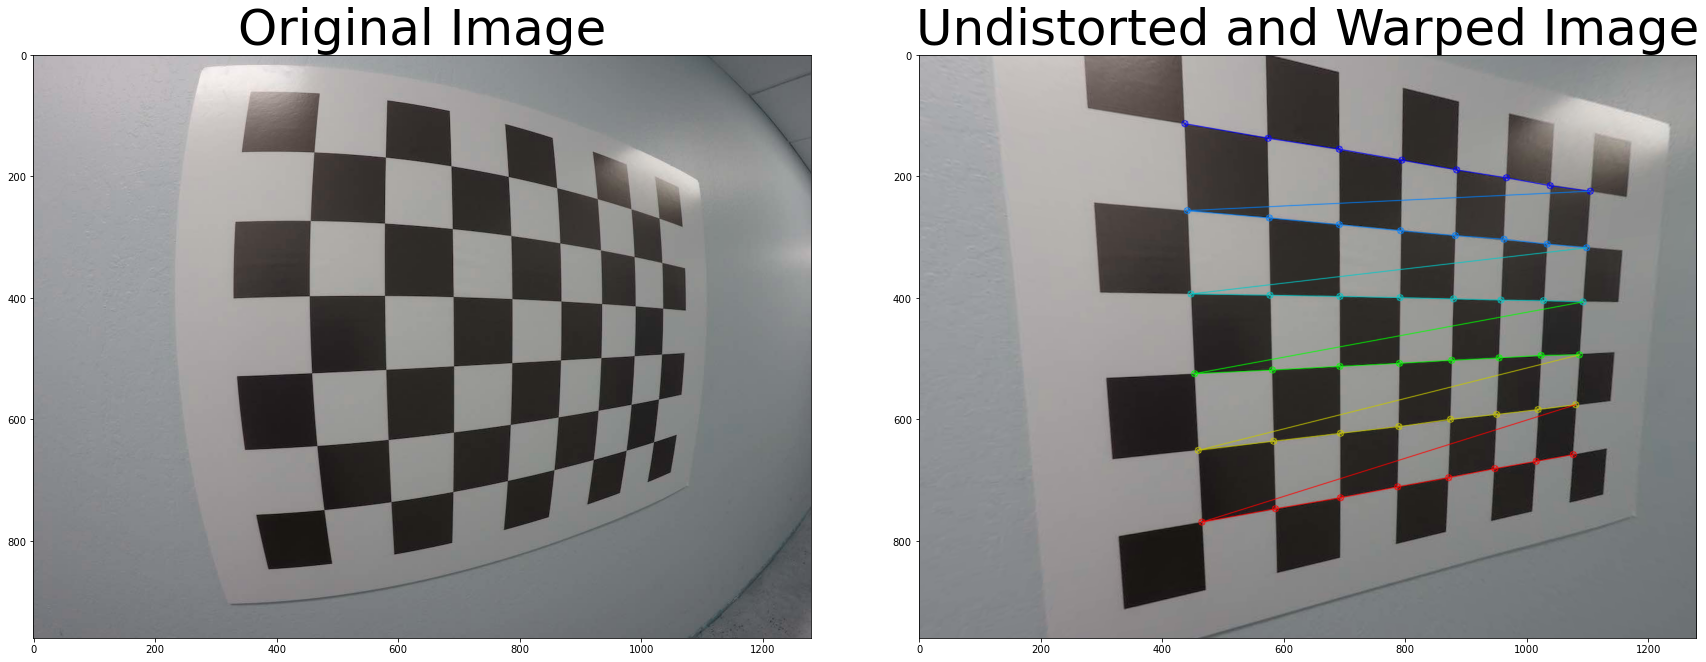

In [51]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
print(perspective_M)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)